In [1]:
import numpy as np
import time
import copy
from tqdm import tqdm
import os
import sys
sys.path.append('../')

import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import numpy.ma as ma

from collections import OrderedDict

import torch
from torch.optim import SGD, Adam, lr_scheduler
device = 'cuda'

import importlib

import TheoryCurves
importlib.reload(TheoryCurves)

import auxFuncs
importlib.reload(auxFuncs)

import pytz
from datetime import datetime
from dateutil.relativedelta import relativedelta
tz = pytz.timezone('US/Eastern')

def time_now():
    return datetime.now(tz)

def time_diff(t_a, t_b):
    t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
    return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

In [2]:
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
linestyles = ['-', '--', ':', '-.']
markerstyles = ['.','*','x']

In [3]:
#Width and height of axes.
w=2.5
h=2
plt.rcParams.update({'font.size': 12, 'figure.figsize': [w,h]})

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'small'

#Helper Function for setting figure size by axis size.
#set_size(w,h,ax)
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

## Calculate Theory Curve: A_list

In [58]:
# numNus = 101
# nu_rs = np.linspace(0, .5, numNus)

# alphas = [.99, 1, 1.01, 50]
# zeta = 0
# lam = 0.01
# etas = np.linspace(0, 1, 21)
# cs = np.linspace(0, .999, 21)

# errors = np.empty((len(alphas), len(etas), len(cs), numNus))


# for etaInd, eta in enumerate(etas):
#     for cInd, c in enumerate(cs):
#         for nuInd in range(numNus):
#             nu_r = nu_rs[nuInd]
#             nu_rp = 1-nu_r
#             errors[:, etaInd, cInd, nuInd] = TheoryCurves.getGlobCorrErrorCurve(alphas, [nu_r, nu_rp], c, lam, zeta, eta)

In [59]:
# #Now calculate the optimal subsampling fraction
# optimalNuInds = np.argmin(errors, axis = 3)
# optimalNus = nu_rs[optimalNuInds]

In [60]:
# for alphaInd, alpha in enumerate(alphas):
#     fig, ax = plt.subplots()
#     im = ax.matshow(optimalNus[alphaInd])
#     plt.colorbar(im)
#     ax.set_xlabel('c (0 to 1)')
#     ax.set_ylabel('noise scale (0 to 1)')
#     ax.set_xticks(np.linspace(0, optimalNus.shape[1]-1, 3))  # Set 3 evenly-spaced tick marks
#     ax.set_yticks(np.linspace(0, optimalNus.shape[2]-1, 3))
#     ax.set_xticklabels(np.linspace(0, cs[-1], 3), fontsize=12)
#     ax.set_yticklabels(np.linspace(0, etas[-1], 3), fontsize=12)
#     ax.set_title(r'$\alpha = $' + str(alpha))
#     #fig.savefig('draftPhaseDiagram'+str(alpha)+'.svg', bbox_inches='tight')

In [61]:
#For a given alpha and correlation strength, plot error as a function of noise and nu

In [62]:
#errors = np.empty((len(alphas), len(etas), len(cs), numNus))

In [63]:
# cInd = 1

# for alphaInd in range(len(alphas)):

#     fig, ax = plt.subplots()
#     im = ax.matshow(errors[alphaInd, :, cInd, :])
#     plt.colorbar(im)
#     ax.set_ylabel(r'$\eta$')
#     ax.set_xlabel(r'$\nu$')
#     ax.set_xticks(np.linspace(0, errors.shape[3]-1, 3))  # Set 3 evenly-spaced tick marks
#     ax.set_yticks(np.linspace(0, errors.shape[1]-1, 3))
#     ax.set_xticklabels(np.linspace(0, .5, 3), fontsize=12)
#     ax.set_yticklabels(np.linspace(0, 1, 3), fontsize=12)
#     ax.set_title(r'$\alpha = $' + str(alphas[alphaInd]) + ' C = ' + str(cs[cInd]))
#     set_size(5,5)
#     #fig.savefig('draftPhaseDiagram'+str(alpha)+'.svg', bbox_inches='tight')

In [64]:
# fig, ax = plt.subplots()
# ax.set_title(r'$\alpha = $' + str(alphas[alphaInd]) + ' C = ' + str(cs[cInd]))
# for etaInd, eta in enumerate(etas):
#     ax.plot(nu_rs, errors[alphaInd, etaInd, cInd, :].T, label = round(eta,3))
# ax.set_xlabel(r'$\nu$')
# set_size(5,5)
# ax.legend(bbox_to_anchor = (1, 1.05), title = 'eta')

# Try Again for Homogeneous Readouts Changing Number of Readouts

In [65]:
importlib.reload(TheoryCurves)

<module 'TheoryCurves' from '/n/home07/bruben/Simulations/Ensemble_Master/EquiCorrPhaseDiagrams/../TheoryCurves.py'>

In [83]:
ks = np.array(list(range(1, 61)) + [np.inf])
#ks = np.array([1, 2] + [np.inf])

numKs = len(ks)

alphas = [.25, 1.5, 1000]
rhos = [0, .2, .4, .8]
zeta = 0
lam = 0
etasq_spacing = .01
c_spacing = .01
s = 1
omega = 0
rho = .25

etasqs = np.linspace(0, 1, int(1/etasq_spacing))
cs = np.linspace(0, 1, int(1/c_spacing))

errors = np.empty((len(alphas), len(rhos), len(etasqs), len(cs), numKs))

nu_0 = 1

for rhoInd, rho in enumerate(rhos):
    for etasqInd, etasq in enumerate(etasqs):
        for cInd, c in enumerate(cs):
            for kInd, k in enumerate(ks):
                errors[:, rhoInd, etasqInd, cInd, kInd] = TheoryCurves.getGlobCorrErrorCurve_Homog_Exclusive(alphas, k, c, nu_0, lam, zeta, (etasq)**(1/2), s = s, omega = omega, rho = rho)

In [84]:
#Now calculate the optimal subsampling fraction
optimalKInds = np.argmin(errors, axis = 4)
optimalKs = ks[optimalKInds]

In [85]:
# Replace np.Inf values with np.nan
optimalKs[optimalKs == np.inf] = np.nan

In [86]:
# Get the min and max, ignoring np.nan
min_val = int(np.nanmin(optimalKs))
max_val = int(np.nanmax(optimalKs))

if max_val == min_val:
    max_val = min_val + 2

# define the bins and normalize
bounds = np.linspace(.5, max_val+.5, max_val)

In [87]:
def get12PhaseTransitionCurve(alpha):
    
    #For these values, the ridgeless losses explode, and there is no transition but rather one or the other is always best.
    assert alpha !=1
    assert alpha != .5
    
    cs = np.linspace(0,1,101)
    
    if alpha>1:
        a = (2-1/alpha)
    if .5<=alpha<1:
        a = (2*alpha-1)/(2+alpha*(4*alpha-5))
    if alpha<.5:
        a = (1-2*alpha)/(2*alpha**2)
        
    etasqs = ((1-cs)/a)
    
    return cs, etasqs

def getInfPhaseTransitionCurve(alpha, s, rho):    
    const = alpha/(rho**2-2*alpha*(1-rho**2))/s
    cs = np.linspace(1+const,1,51)
    etasqs = (cs-1)/const
    return cs, etasqs

#def get1kPhaseTransitionCurve(alpha, k)

/tmp/ipykernel_989732/2212417759.py:22: RuntimeWarning: divide by zero encountered in true_divide
  minKOverZero = np.nanmin(np.divide(optimalKs[alphaInd, rhoInd], optimalKs[alphaInd, rhoInd]>1))


10.0


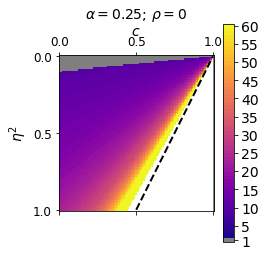

2.0


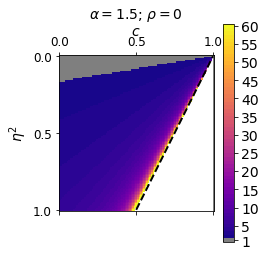

2.0


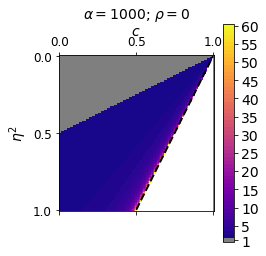

11.0


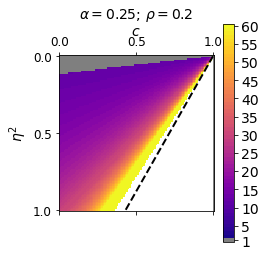

2.0


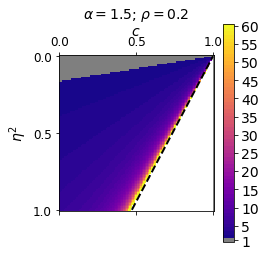

2.0


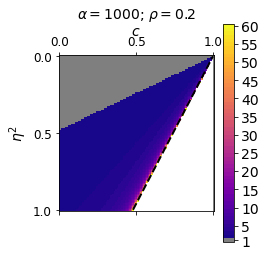

19.0


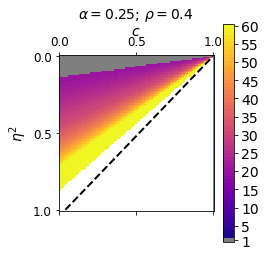

2.0


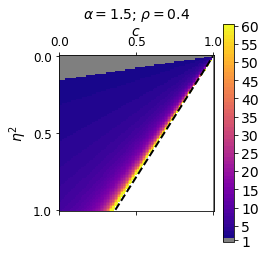

2.0


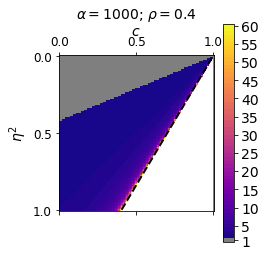

inf


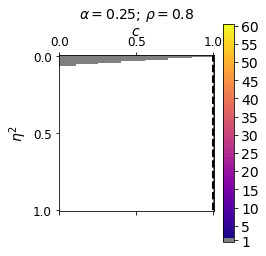

6.0


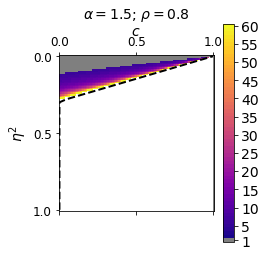

2.0


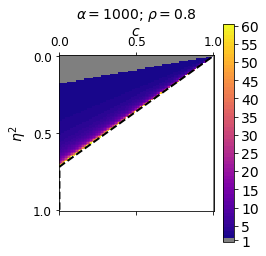

In [91]:
for rhoInd, rho in enumerate(rhos):
    for alphaInd, alpha in enumerate(alphas):

        fig, ax = plt.subplots()

        cmap = plt.cm.plasma # define the colormap
        # extract all colors from the plasma map.
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # force the first color entry to be grey
        cmaplist[0] = (.5, .5, .5, 1.0)

        # create the new map
        cmap = mpl.colors.LinearSegmentedColormap.from_list(
            'Custom cmap', cmaplist, cmap.N)

        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

        im = ax.matshow(optimalKs[alphaInd, rhoInd], cmap=cmap, norm=norm)
        #im = ax.matshow((optimalKs[alphaInd]==2)+1, cmap=cmap, norm=norm)
        cbar = plt.colorbar(im, ticks=np.append([1], np.arange(5, max_val+1, 5)))

        minKOverZero = np.nanmin(np.divide(optimalKs[alphaInd, rhoInd], optimalKs[alphaInd, rhoInd]>1))
        print(minKOverZero)
        #if np.sum(optimalKs[alphaInd]==2)>0:
    #     if alpha !=1:
    #         etasq_12, c_12 = get12PhaseTransitionCurve(alpha)

    #         # convert to pixel coordinates
    #         pixel_c_12 = np.interp(c_12, cs, np.arange(len(cs)))
    #         pixel_etasq_12 = np.interp(eta_12, etasqs, np.arange(len(etasqs)))
    #         ax.plot(pixel_etasq_12,pixel_c_12, color='white', ls = '--', lw = 2)  # plot in white for visibility

        etasq_inf, c_inf = getInfPhaseTransitionCurve(alpha, s, rho)

        # convert to pixel coordinates
        pixel_c_inf = np.interp(c_inf, cs, np.arange(len(cs)))
        pixel_etasq_inf = np.interp(etasq_inf, etasqs, np.arange(len(etasqs)))

        ax.plot(pixel_etasq_inf,pixel_c_inf, color='black', ls = '--', lw = 2) 

        ax.set_xlabel(r'$c$')
        ax.set_ylabel(r'$\eta^2$')

        ax.xaxis.set_label_coords(0.5, 1.2)

        ax.set_xticks(np.linspace(0, optimalKs.shape[2]-1, 3))
        ax.set_yticks(np.linspace(0, optimalKs.shape[3]-1, 3))
        ax.set_xticklabels(np.linspace(0, cs[-1], 3), fontsize=12)
        ax.set_yticklabels(np.linspace(0, etasqs[-1], 3), fontsize=12)
        ax.set_title(r'$\alpha = $' + str(alpha) + r'; $\rho = $' + str(rho))
        set_size(3,3)
        fig = plt.gcf()
        fig.tight_layout()
        plt.show()
        title = 'PhasePlot_alpha_' + str(alpha)+'.svg'
        fig.savefig(title, bbox_inches='tight', dpi = 500, transparent = True)

### Plot Error Curves in different regions of the phase diagram

In [41]:
def runHomEnsGlobCorr(ks, c, eta, lam=0, zeta=0, numAlphas = 100, alpha_max = 100):
    alpha_min = .01
    alphas_theory = np.logspace(np.log10(alpha_min), np.log10(alpha_max), numAlphas)
    
    ErrorCurves = np.zeros((numAlphas, len(ks)))
    
    for kInd, k in enumerate(ks):
        ErrorCurves[:, kInd] = TheoryCurves.getGlobCorrErrorCurve_Homog_Exclusive(alphas_theory, k, c, lam = lam, zeta = zeta, eta = eta)
        
    return alphas_theory, ErrorCurves

In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def plotHomEnsCurves(kMax, c, eta, lam=0, zeta = 0, numAlphas = 100, alpha_max = 5):
    
    ks = np.append(np.arange(1, kMax+1, 1), np.inf)
    
    alphas_theory, ErrorCurves = runHomEnsGlobCorr(ks, c, eta, lam=lam, zeta=zeta, numAlphas = numAlphas, alpha_max = alpha_max)
    
    cmap = plt.cm.plasma  # define the colormap
    # extract all colors from the plasma map.
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    cmaplist[0] = (.5, .5, .5, 1.0)

    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    # Create a normalized color map
    norm = colors.Normalize(vmin=1, vmax=kMax)

    # Now Plot mean learning curves and mean maximum as a function of variance
    fig, ax = plt.subplots()
    for kInd, k in enumerate(ks):
        if k==1:
            color = cmap(norm(k))
            ax.plot(alphas_theory, ErrorCurves[:,kInd], color = color, linewidth = 2,  label = r'$k = 1$')
        elif k<np.inf:
            color = cmap(norm(k))  # Get the color from the colormap
            ax.plot(alphas_theory ,ErrorCurves[:, kInd], color=color, linewidth=1)
        else:
            color = 'black'
            ax.plot(alphas_theory ,ErrorCurves[:, kInd], color=color, linewidth=2, ls = '--', label = r'$k \to \infty$')

    set_size(3,2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_ylim([ax.get_ylim()[0], 5])
    #ax.set_yticks([.1, 1])
    ax.set_xlabel(r'$\alpha = P/M$', fontsize=14)  # Increase the fontsize
    ax.set_ylabel(r'$\langle E_g \rangle$', fontsize=14)  # Increase the fontsize
    ax.grid(True, linestyle='--', alpha=.6)  # Add a grid
    #plt.tick_params(labelsize=12)  # Increase the size of the ticks labels

    #Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.append([1], np.arange(10, kMax+1, 10)))
    cbar.set_label(r'$k$')#, fontsize=14)
    ax.set_title('c'+str(c)+'_eta'+str(eta))
    fig.tight_layout()
    ax.legend(bbox_to_anchor = (1.4, 1), loc = 'upper left')
    plt.savefig('HomErrCurves_c'+str(c)+'_eta'+str(eta)+'.svg', bbox_inches = 'tight', dpi=300)  # Save the figure in high resolution
    plt.show()

In [43]:
params_list = [(.25, .1), (.5, .75), (.9, .9)]

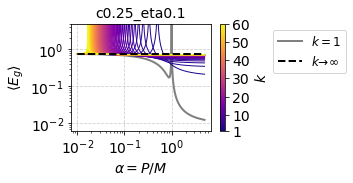

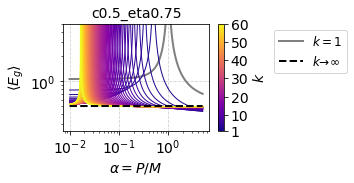

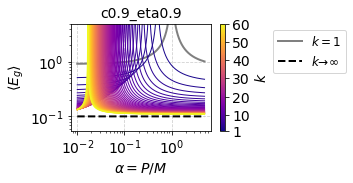

In [44]:
for params in params_list:
    c, eta = params
    plotHomEnsCurves(60, c, eta, lam=0, zeta = 0, numAlphas = 10000, alpha_max = 5)  

# Collapsed Phase Diagram

What's important is the effective noise to signal ratio $\frac{\eta^2}{s(1-c)}$ and the "code-task alignment" which is in this case parameterized by $\rho$

In [26]:
ks = np.array(list(range(1, 101)) + [10000, np.inf])
#ks = np.array([1, 2] + [np.inf])

numKs = len(ks)

alphas = [.25, .75, 1.5, 1000]
zeta = 0
lam = 0
nsr_spacing = .01
rho_spacing = .01
s = 1
omega = 0
c = .5

nsrs = np.linspace(0, 2, int(1/nsr_spacing))
rhos = np.linspace(0, 1, int(1/rho_spacing))

errors = np.empty((len(alphas), len(nsrs), len(rhos), numKs))

nu_0 = 1

for nsrInd, nsr in enumerate(nsrs):
    for rhoInd, rho in enumerate(rhos):
        for kInd, k in enumerate(ks):
            eta = (nsr*s*(1-c))**(1/2)
            errors[:, nsrInd, rhoInd, kInd] = TheoryCurves.getGlobCorrErrorCurve_Homog_Exclusive(alphas, k, c, nu_0, lam, zeta, eta, s = s, omega = omega, rho = rho)

In [27]:
#Now calculate the optimal subsampling fraction
optimalKInds = np.argmin(np.flip(errors, axis = 3), axis = 3)
optimalKs = np.flip(ks)[optimalKInds]

In [28]:
# Replace np.Inf values with np.nan
optimalKs[optimalKs == np.inf] = np.nan

In [29]:
# Get the min and max, ignoring np.nan
min_val = int(np.nanmin(optimalKs))
max_val = int(np.nanmax(np.multiply(optimalKs, optimalKs<10000)))

if max_val == min_val:
    max_val = min_val + 2

# define the bins and normalize
bounds = np.linspace(.5, max_val+.5, max_val)

In [30]:
def getIntersection(alpha):
    if alpha<=1:
        R = -(-alpha+alpha**2)/(1+2*alpha-alpha**2+alpha**3)
        rho = (alpha*(2-alpha+alpha**2)/(1+2*alpha-alpha**2+alpha**3))**(1/2)
        return rho, R
    #else
    R = (alpha-1)/alpha/(2+alpha)
    rho = ((1+alpha)/(2+alpha))**(1/2)
    return rho, R

def getNSRInf(alpha):
    rhomax, _ = getIntersection(alpha)
    rhos_inf = np.linspace(0, rhomax, 101)
    return rhos_inf, -(rhos_inf**2 - 2*alpha*(1-rhos_inf**2))/alpha

def getNSR1(alpha):
    rhomin, _ = getIntersection(alpha)
    rhos_1 = np.linspace(rhomin, 1, 101)
    
    if alpha<=1:
        return rhos_1, (alpha*(1-alpha)*(1-rhos_1**2))
    #else
    return rhos_1, ((alpha-1)*(1-rhos_1**2)/alpha)

10.0


/tmp/ipykernel_896943/1603743346.py:21: RuntimeWarning: divide by zero encountered in true_divide
  minKOverZero = np.nanmin(np.divide(optimalKs[alphaInd], optimalKs[alphaInd]>1))


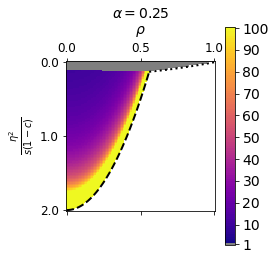

3.0


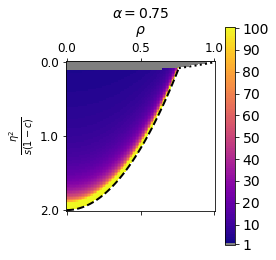

2.0


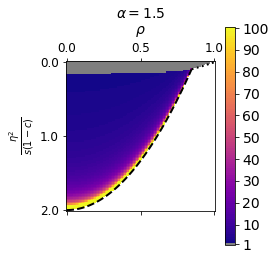

2.0


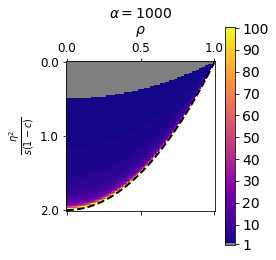

In [34]:
for alphaInd, alpha in enumerate(alphas):

    fig, ax = plt.subplots()

    cmap = plt.cm.plasma # define the colormap
    # extract all colors from the plasma map.
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    cmaplist[0] = (.5, .5, .5, 1.0)

    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    im = ax.matshow(optimalKs[alphaInd], cmap=cmap, norm=norm)
    #im = ax.matshow((optimalKs[alphaInd]==2)+1, cmap=cmap, norm=norm)
    cbar = plt.colorbar(im, ticks=np.append([1], np.arange(10, max_val+1, 10)))

    minKOverZero = np.nanmin(np.divide(optimalKs[alphaInd], optimalKs[alphaInd]>1))
    print(minKOverZero)
    #if np.sum(optimalKs[alphaInd]==2)>0:
#     if alpha !=1:
#         etasq_12, c_12 = get12PhaseTransitionCurve(alpha)

#         # convert to pixel coordinates
#         pixel_c_12 = np.interp(c_12, cs, np.arange(len(cs)))
#         pixel_etasq_12 = np.interp(eta_12, etasqs, np.arange(len(etasqs)))
#         ax.plot(pixel_etasq_12,pixel_c_12, color='white', ls = '--', lw = 2)  # plot in white for visibility

    rho_inf, nsrs_inf = getNSRInf(alpha)

    # convert to pixel coordinates
    pixel_rhos_inf = np.interp(rho_inf, rhos, np.arange(len(rhos)))
    pixel_nsrs_inf = np.interp(nsrs_inf, nsrs, np.arange(len(nsrs)))
    
    ax.plot(pixel_rhos_inf,pixel_nsrs_inf, color='black', ls = '--', lw = 2) 
    
    rhos_1, nsrs_1 = getNSR1(alpha)

    # convert to pixel coordinates
    pixel_rhos_1 = np.interp(rhos_1, rhos, np.arange(len(rhos)))
    pixel_nsrs_1 = np.interp(nsrs_1, nsrs, np.arange(len(nsrs)))

    ax.plot(pixel_rhos_1, pixel_nsrs_1, color='black', ls = 'dotted', lw = 2) 

    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$\frac{\eta^2}{s(1-c)}$')

    ax.xaxis.set_label_coords(0.5, 1.25)

    ax.set_xticks(np.linspace(0, optimalKs.shape[1]-1, 3))
    ax.set_yticks(np.linspace(0, optimalKs.shape[2]-1, 3))
    ax.set_xticklabels(np.linspace(0, rhos[-1], 3), fontsize=12)
    ax.set_yticklabels(np.linspace(0, nsrs[-1], 3), fontsize=12)
    ax.set_title(r'$\alpha = $' + str(alpha))
    set_size(3,3)
    fig = plt.gcf()
    fig.tight_layout()
    plt.show()
    title = 'PhasePlot_collapsed_alpha_' + str(alpha)+'.jpg'
    fig.savefig(title, bbox_inches='tight', dpi = 500, transparent = True)

### Plot Error Curves in different regions of the phase diagram

Plotting $\frac{E}{s(1-c)}$

In [45]:
def runHomEnsGlobCorr(ks, c, eta, lam=0, zeta=0, numAlphas = 100, alpha_max = 100, s = 1, omega = 0, rho = 0):
    alpha_min = .01
    alphas_theory = np.logspace(np.log10(alpha_min), np.log10(alpha_max), numAlphas)
    
    ErrorCurves = np.zeros((numAlphas, len(ks)))
    
    for kInd, k in enumerate(ks):
        ErrorCurves[:, kInd] = TheoryCurves.getGlobCorrErrorCurve_Homog_Exclusive(alphas_theory, k, c, lam = lam, zeta = zeta, eta = eta, s = s, omega = omega, rho = rho)
        
    return alphas_theory, ErrorCurves

In [77]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def plotHomEnsCurves(kMax, c, eta, lam=0, zeta = 0, numAlphas = 100, alpha_max = 5, s = 1, omega = 0, rho = 0):
    
    NSR = (eta**2)/s/(1-c)
    ks = np.append(np.arange(1, kMax+1, 1), np.inf)
    
    alphas_theory, ErrorCurves = runHomEnsGlobCorr(ks, c, eta, lam=lam, zeta=zeta, numAlphas = numAlphas, alpha_max = alpha_max, s = s, omega = omega, rho = rho)
    
    cmap = plt.cm.plasma  # define the colormap
    # extract all colors from the plasma map.
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    cmaplist[0] = (.5, .5, .5, 1.0)

    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    # Create a normalized color map
    norm = colors.Normalize(vmin=1, vmax=kMax)

    # Now Plot mean learning curves and mean maximum as a function of variance
    fig, ax = plt.subplots()
    for kInd, k in enumerate(ks):
        if k==1:
            color = cmap(norm(k))
            ax.plot(alphas_theory, ErrorCurves[:,kInd]/s/(1-c), color = color, linewidth = 2,  label = r'$k = 1$')
        elif k<np.inf:
            color = cmap(norm(k))  # Get the color from the colormap
            ax.plot(alphas_theory ,ErrorCurves[:, kInd]/s/(1-c), color=color, linewidth=1)
        else:
            color = 'black'
            ax.plot(alphas_theory ,ErrorCurves[:, kInd]/s/(1-c), color=color, linewidth=2, ls = '--', label = r'$k \to \infty$')

    set_size(3,2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_ylim([ax.get_ylim()[0], 20])
    #ax.set_yticks([.1, 1])
    ax.set_xlabel(r'$\alpha = P/M$', fontsize=14)  # Increase the fontsize
    ax.set_ylabel(r'$\langle E_g/(s(1-c)) \rangle$', fontsize=14)  # Increase the fontsize
    ax.grid(True, linestyle='--', alpha=.6)  # Add a grid
    #plt.tick_params(labelsize=12)  # Increase the size of the ticks labels

    #Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.append([1], np.arange(10, kMax+1, 10)))
    cbar.set_label(r'$k$')#, fontsize=14)
    ax.set_title('NSR'+str(round(NSR,3))+'_rho'+str(round(rho,3)))
    fig.tight_layout()
    ax.legend(bbox_to_anchor = (1.4, 1), loc = 'upper left')
    plt.savefig('HomErrCurves_NSR'+str(round(NSR,3))+'_rho'+str(round(rho,3))+'.svg', bbox_inches = 'tight', transparent = True, dpi=500)  # Save the figure in high resolution
    plt.show()

In [73]:
params_list = [(0,0), (.1, .1), (1, .5), (1.5, 0.7)]

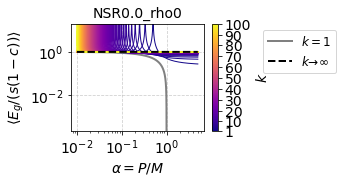

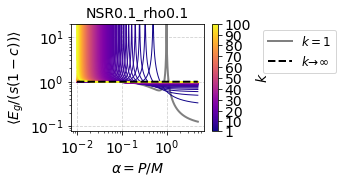

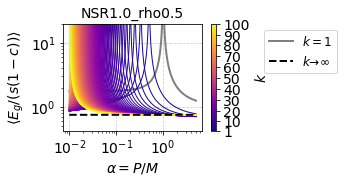

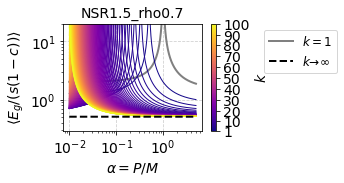

In [78]:
c = .1
s = 1
for params in params_list:
    NSR, rho = params
    eta = (NSR*s*(1-c))**(1/2)
    plotHomEnsCurves(100, c, eta, lam=0, zeta = 0, numAlphas = 5000, alpha_max = 5, s = s, rho = rho)  